In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assignment 03

### 1.1.
Only from looking at the plotted data, which degree of a polynomial would be your best guess that would fit the data without over- or underfitting it? Why? 

M=4 will be the optimal choice that would fit the data without over- or underfitting because there are 4 ups and downs in the plot which means the data distrubition behaves like a 4th degree polynomial. If M is higher then model will overfit beacuse it is too sensitive to noise, on the other hand if M is lower it won't generalize the data and look like a straight line.

### 1.2.
Predict how the bias and variance (high / low) and fit (under / over) would be for:
* A constant model (i.e. a horizontal line)
  * bias: high : the model assumes the data can be represented with a constant value and can't capture any trends in data
  * variance: low : the model lacks flexibilty and does not change with different training data
  * fit: under : the model can't capture any real trends, relations, complexities in the data
    
* A linear model
  * bias: high : The model assumes a linear relation between inputs and targets 
  * variance: low : The model can vary very little with different training data but still not much variance observed because it has a linear form
  * fit: under : The model lacks the ability to catch complex relations and trends in the data because it is too rigid
    
* A polynomial model of degree 10
  * bias: low : The model is flexible and has a wide range of values that can be represented with low bias
  * variance: high : The model is very sensitive to the variations in the training data and the predictions will change with different training data
  * fit: over : Since the model captures everything even the noise in the training data and therefore resulting in overfitting

### 1.3.
Use `numpy` to load the two splits of the dataset

In [11]:
data_train = np.loadtxt("data_train.csv", delimiter=",")  # TODO: Load CSV

x_train = np.array(data_train[:,0]).reshape(-1,1)  # TODO: Take input slice from data_train
y_train = np.array(data_train[:,-1])  # TODO: Take target slice from data_train

data_test = np.loadtxt("data_test.csv", delimiter=",")  # TODO: Load CSV
x_test = np.array(data_test[:,0]).reshape(-1,1)  # TODO: Take input slice from data_test
y_test = np.array(data_test[:,-1])  # TODO: Take target slice from data_test
print(y_train)

[ 3.35044479  6.69767127  9.83623927 10.70436493  8.68395325  9.46707399
  8.52004198  8.75521645  6.36809777  4.05687574  1.922098    1.43081808
  1.85773042  2.20581726  1.89859572  4.50402656  3.44806192  5.99748439
  7.54436848 10.49770402 11.41042935 10.26389421 11.7684456  14.38868071
 12.44681109 13.50803212 12.8444083  11.12714476 10.34631076  5.31698712]


and use `matplotlib` to recreate the plot from Figure 1.

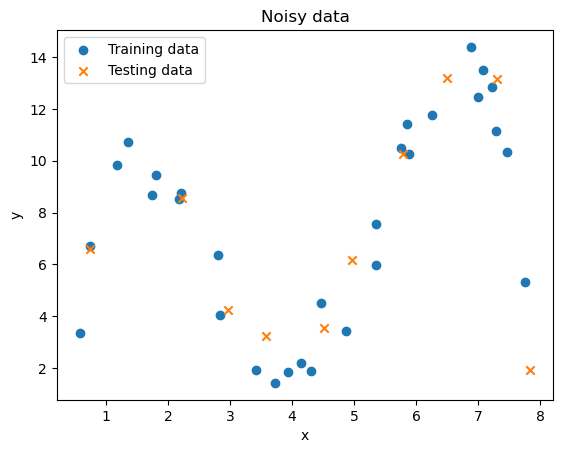

In [12]:
fig, ax = plt.subplots()
# TODO: Plot the training data
# TODO: Plot the testing data
...
ax.scatter(x_train, y_train, label="Training data")
ax.scatter(x_test, y_test, label="Testing data",marker='x')
# Don't forget to annotate your plots!
# (axes labels, title, legend, units, etc.)
ax.set_title("Noisy data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### 1.4. 
Using the `sklearn.linear_model.LinearRegression` class, fit a linear model to the data in the `data_train.csv` file.

Compute the MSE error for the data in `data_test.csv` and plot the predicted line together with the original data.

In [13]:
model = LinearRegression()  # TODO: Create a linear regression model
model.fit(x_train, y_train)  # TODO: Fit the model to the training data
pred = model.predict(x_test)  # TODO: Predict the testing data

# TODO: Calculate the mean squared error between the predictions and the
# testing data targets
mse = np.mean((pred - y_test)**2)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 14.78091268758106


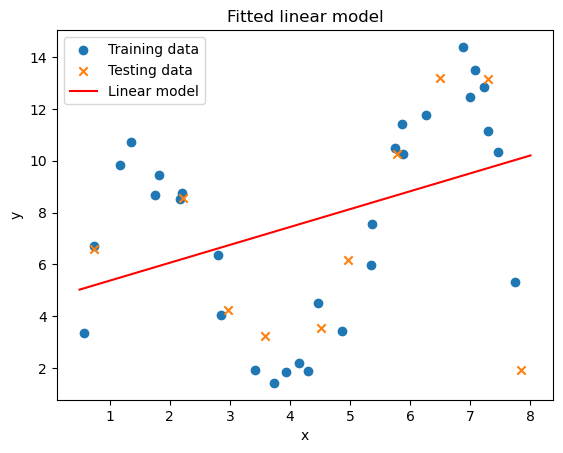

In [14]:
# Generate points to plot the curve of the model
full_x = np.linspace(0.5, 8, 100)[:, np.newaxis]
# TODO: Predict the output values for the curve
y_curve = model.predict(full_x)

fig, ax = plt.subplots()
# TODO: Plot the training data
# TODO: Plot the testing data
# TODO: Plot the model curve
...
ax.scatter(x_train, y_train, label="Training data")
ax.scatter(x_test, y_test, label="Testing data", marker='x')
ax.plot(full_x, y_curve, label="Linear model", color = "red")
ax.set_title("Fitted linear model")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### 1.5.
Create a class that can fit a polynomial model of an arbitrary degree. For example `m = PolynomialModel(degree=23)`.

Include a `fit(x_train, y_train)` method for fitting some training data and a `predict(x)` method for performing inference for the values of unseen data.

**Hint:** You can use `sklearn.linear_model.LinearRegression` and
`sklearn.preprocessing.PolynomialFeatures` together to define non-linear models by combining a linear model with basis functions.

In [15]:
class PolynomialModel:
    """" Class for polynomial regression.
    
    This class fits a polynomial regression model to a given
    training dataset by using a linear model combined with a
    polynomial feature transformation (basis function).
    """

    def __init__(
            self,
            degree: int
    ) -> None:
        """Constructor.
        
        Parameters:
            degree : int
                The degree of the polynomial model.
        """

        # TODO: Implement constructor
        # TODO: Create polynomial feature transformer
        # TODO: Create linear regression model
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree)
        self.linear_model = LinearRegression()
    
    def fit(
            self,
            x_train: np.ndarray,
            y_train: np.ndarray
    ) -> "PolynomialModel":
        """Fit the polynomial model to the training data.

        Parameters:
            x_train : np.ndarray[d, f]
                The input features of the training data witn d samples
                and f features.
            y_train : np.ndarray[d]
                The target values of the training data with d samples.
        
        Returns:
            self : PolynomialModel
                The fitted model.
        """

        # TODO: Transform the input features
        # TODO: Fit the linear model to the transformed features and
        # target values
        # This line add new dimensions to x_train by taking its x^2, x^3, x^4, etc. and make it polynomial
        x_train_poly = self.poly_features.fit_transform(x_train)
        # And in this line we fit poly_x_train and get similar to this y = a+ b1*x + b2*x^2 + b3*x^3 + b4*x^4
        self.linear_model.fit(x_train_poly, y_train)

        return self

    def predict(
            self,
            x: np.ndarray
    ) -> np.ndarray:
        """Predict the target values for the given input features.

        Args:
            x: np.ndarray[d, f]
                The input features to predict the target values for with
                d samples and f features.

        Returns:
            pred: np.ndarray[d]
                The predicted target values with d samples.
        """
        
        # TODO: Transform the input features
        # TODO: Predict the target values
        x_poly = self.poly_features.fit_transform(x)
        pred = self.linear_model.predict(x_poly)
    
        return pred

Using your class, fit models with $\mathit{degrees} \in \{0, 1, 2, 3, 4, 5, 20\}$ and plot the fitted curves along with the original data.

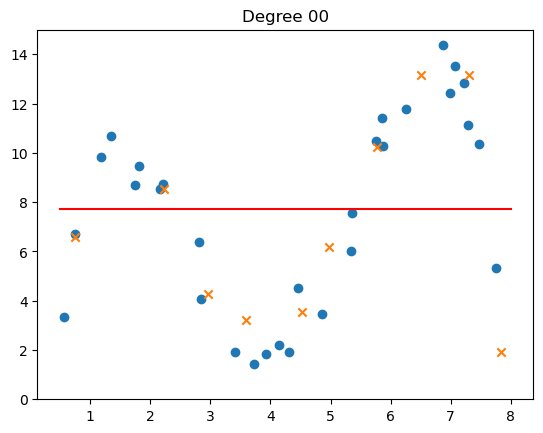

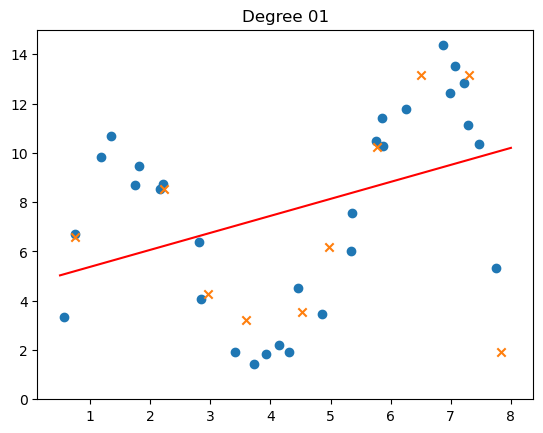

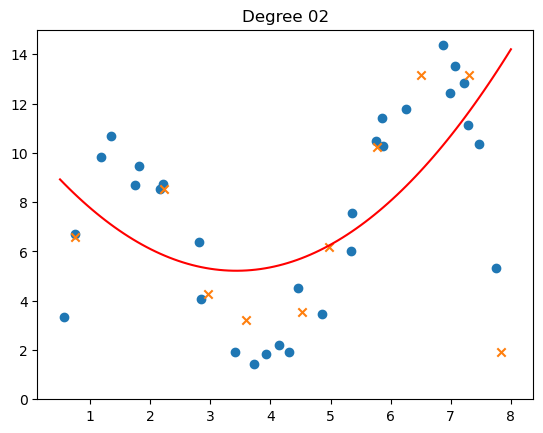

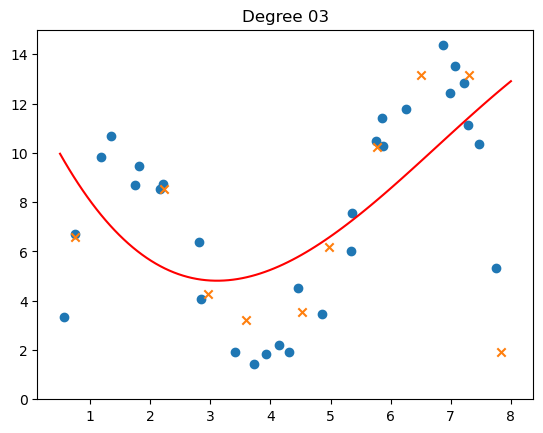

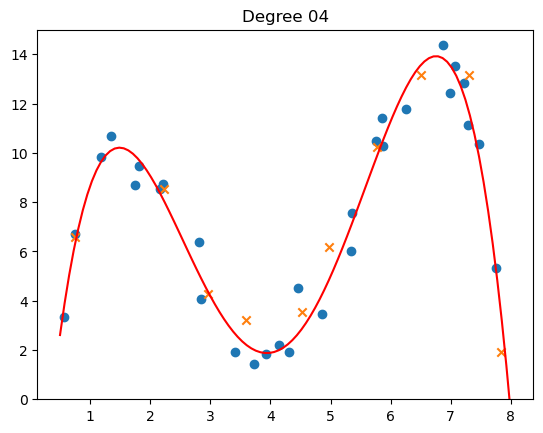

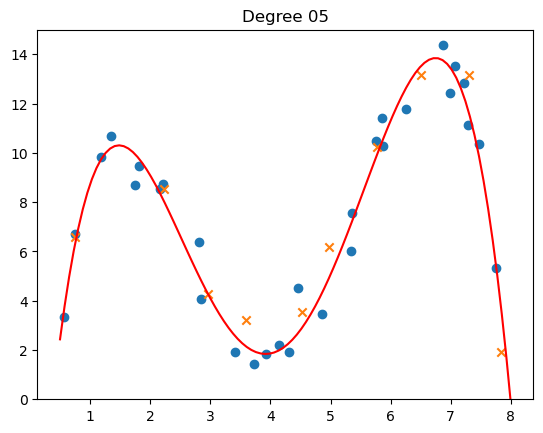

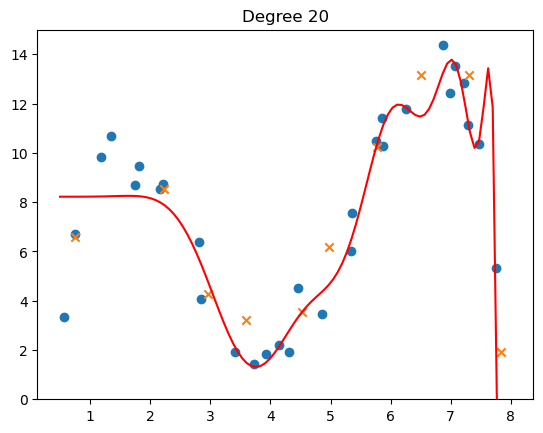

In [16]:
# TODO: Create a PolynomialModel object for each degree
models = {d: PolynomialModel(d) for d in [0, 1, 2, 3, 4, 5, 20]}

for d, model in models.items():
    fig, ax = plt.subplots()
    
    # TODO: Plot the training and test data
    # TODO: Fit a model to the training data
    # TODO: Predict on the x_full values to generate the model's curve
    # TODO: Plot the curve
    ax.scatter(x_train, y_train, label="Training data")
    ax.scatter(x_test, y_test, label="Testing data", marker='x')
    model.fit(x_train, y_train)
    y_curve = model.predict(full_x)
    ax.plot(full_x, y_curve, label="Polynomial model", color = "red")
    
    ax.set_title(f"Degree {d:02d}")
    ax.set_ylim(0, 15)

### 1.6.

Create a function `measure_bias_var_mse(model, x_train, y_train, x_test, y_test, n)` that _estimates_ the bias, variance and, mean square error of different models.

In [17]:
def sample_with_replacement(
        x: np.ndarray,
        y: np.ndarray
    ) -> tuple[np.ndarray, np.ndarray]:
    """Auxiliary function to sample with replacement.

    Parameters:
        x : np.ndarray[d, f]
            A dataset with d points and f features.

        y : np.ndarray[d]
            Targets corresponding to the inputs of the dataset.
    
    Returns:
        x_sampled : np.ndarray[d, f]
            A sampled dataset with d points and f features.

        y_sampled : np.ndarray[d]
            Targets corresponding to the inputs of the sampled dataset.
    """

    # TODO: Implement the sampling with replacement
    sample_idx =  np.random.choice(x.shape[0], size=x.shape[0], replace=True)

    return x[sample_idx], y[sample_idx]

In [18]:
def measure_bias_var_mse(
    model,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
    n: int = 200,
) -> tuple[float, float, float]:
    """Measures the bias, variance and MSE of a model.

    Parameters:
        model: Any
            A model object with fit() and predict() methods.

        x_train: np.ndarray[d, f] or np.ndarray[d]
            A training dataset with d points and f features to be sampled
            with replacement to measure the bias-variance.

        y_train: np.ndarray[d]
            Targets corresponding to the inputs of the training dataset.

        x_test : np.ndarray[d_test, f] or np.ndarray[d_test]
            The test dataset for computing the average loss, bias, and variance.

        y_test : np.ndarray[d_test]
            Targetscorresponding to the inputs of the test dataset.

        n: int (Default=200)
            Number of sampling rounds to measure the bias-varias.
            Each sampled dataset has the same size as the original training set.
    
    Returns:
        avg_bias: float
            The average bias over the test dataset.
        avg_var: float
            The average variance over the test dataset.
        mse: float
            The average expected loss over the test dataset.
    """

    # Array for storing the predictions of each model
    all_pred = np.zeros((n, y_test.shape[0]), dtype=np.float64)

    # sklearn expects 2D inputs
    if x_train.ndim == 1:
        x_train = x_train[:, np.newaxis]
    if x_test.ndim == 1:
        x_test = x_test[:, np.newaxis]

    # Bootstrap sampling to generate n models
    for i in range(n):
        # Sample dataset with replacement
        x_boot, y_boot = sample_with_replacement(x_train, y_train)

        # TODO: Fit the model to the sampled dataset
        # TODO: Predict on the test set and store in the all_pred array
        model.fit(x_boot, y_boot)
        all_pred = model.predict(x_test)

    # TODO: Calculate the expected prediction model
    mean_pred = np.mean(all_pred, axis=0)
    
    # TODO: Calculate the bias and variance
    bias = np.mean((mean_pred - y_test)**2)
    var = np.mean(np.var(all_pred, axis=0))

    # TODO: Calculate the mean squared error
    mse = np.mean(np.mean((all_pred - y_test)**2, axis=0))

    return bias, var, mse

### 1.7
Using your function for estimating the MSE, bias and variance, compute them for models with $\mathit{degrees} \in \{0,\, 1,\, \dots,\, 10\}$.

In [19]:
# TODO: Create a PolynomialModel object for each degree
models = {d: PolynomialModel(d) for d in range(11)}

# TODO: Measure the bias, variance, and MSE for each model
results = {d: measure_bias_var_mse(model,x_train,y_train,x_test,y_test) for d, model in models.items()}

Generate a plot of  the MSE, bias and variance, where the $x$ axis represents the degrees of the polynomial model, and the $y$ axis are the estimated metrics.

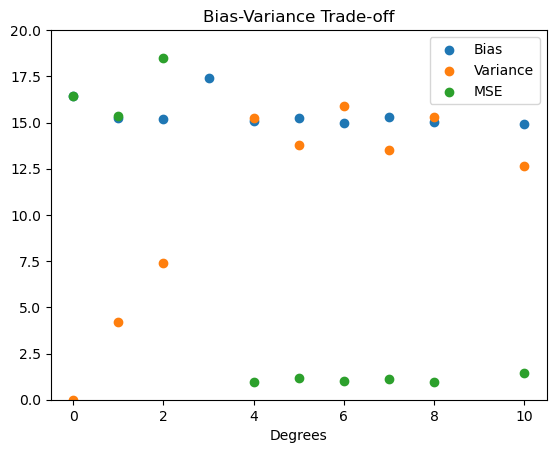

In [20]:
fig, ax = plt.subplots()
    
# TODO: Plot the Bias
# TODO: Plot the Variance
# TODO: Plot the MSE
degrees = list(results.keys())
biases = [result[0] for result in results.values()]
variances = [result[1] for result in results.values()]
mses = [result[2] for result in results.values()]
ax.scatter(degrees,biases, label="Bias")
ax.scatter(degrees, variances, label="Variance")
ax.scatter(degrees,mses, label="MSE")

ax.set_xlabel("Degrees")
ax.set_title(f"Bias-Variance Trade-off")
ax.set_ylim(0, 20)
ax.legend()
#print(variances)

Do the computed values and plot match your predictions from question 1.2.?